## 기본 입출력

In [2]:
import cv2
import numpy as np

# 이미지 읽기
img = cv2.imread('image.jpg')

# 이미지 보여주기
cv2.imshow('Image',img)
cv2.waitKey(0)

# 이미지 저장
cv2.imwrite('saved_image.jpg',img)

True

## 색상변환과 크기 조정

In [7]:
import cv2

# 이미지 읽기
img = cv2.imread('image.jpg')

# 그레이스케일로 변환
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imwrite('gray_image.jpg',gray)

# 이미지 크기 조정
resized = cv2.resize(img,(300,200)) # width=300, height=200
cv2.imwrite('resized_image.jpg',resized)

True

## 블러링과 이진화

In [23]:
import cv2

img = cv2.imread('image.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 가우시안 블러
blurred = cv2.GaussianBlur(gray, (5,5),0)
cv2.imwrite('blurred_image.jpg',blurred)

# 이진화
_, binary = cv2.threshold(gray, 127, 225, cv2.THRESH_BINARY)

# 적응형 이진화
adaptive = cv2.adaptiveThreshold(gray, 255,
                                 cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                 cv2.THRESH_BINARY, 11, 2)
cv2.imwrite('adaptive_image.jpg', adaptive)

True

## 엣지와 윤곽선

In [30]:
import cv2
import numpy as np

img = cv2.imread('image.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Canndy 엣지 검출
edges = cv2.Canny(gray, 100, 200)
cv2.imwrite('edges_image.jpg',edges)

# 윤곽선 검출
contours, hierarchy = cv2. findContours(edges,
                                        cv2.RETR_EXTERNAL,
                                        cv2.CHAIN_APPROX_SIMPLE)
# 윤곽선 그리기
cv2.drawContours(img, contours, -1,(0,255,0),2)
# 결과 이미지 표시
cv2.imwrite('Contours_image.jpg',img)
# cv2.imshow('Contours',img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

True

## 비디오 처리

In [33]:
import cv2

# 비디오 캡처 객체 생성
cap = cv2.VideoCapture(0) # 0은 기본 카메라

while True:
    ret, frame = cap.read()

    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    cv2.imshow('Video',frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

### 특징점 추출

In [39]:
import cv2

img = cv2.imread('image.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# SIFT 객체 생성
sift = cv2.SIFT_create()

# 키포인트 검출
keypoints = sift.detect(gray, None)

# 키포인트 그리기
img_keypoints = cv2.drawKeypoints(gray, keypoints, None)

cv2.imwrite('keypoints_image.jpg',img_keypoints)

True

## 도형(텍스트) 그리기

In [53]:
import cv2
import numpy as np

# 빈 이미지 생성
img = np.zeros((512,512,3), np.uint8)

# 선 그리기
cv2.line(img, (0,0), (511,511), (255,0,0),5)

# 사각형 그리기 
cv2.rectangle(img, (384,0), (510,128), (0,255,0),3)

# 원 그리기
cv2.circle(img, (447,63), 63, (0,0,255),-1)

# 텍스트 쓰기
cv2.putText(img, 'OpenCV',(10,500),
            cv2.FONT_HERSHEY_SIMPLEX, 4, (255,255,255),2)

# 이미지 표시
cv2.imshow('Drawing',img)
cv2.waitKey(0) # 키입력을 기다림
cv2.destroyAllWindows(0)

SystemError: <built-in function destroyAllWindows> returned NULL without setting an exception

In [58]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [17]:
import numpy as np
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import joblib

In [19]:
pip install setuptools

Note: you may need to restart the kernel to use updated packages.


In [20]:
df = pd.read_csv('http://w.pul.kr/dataset/ms001.csv', encoding='euc-kr')
df.head()

,ID,최종가중치,학교ID,도시규모,도시규모별분석용,학년도,광역시도,시도별,학교급별,학교명,...,키,몸무게,혈당식전mgdl,총콜레스테롤mgdl,ASTUL,ALTUL,혈색소gdl,간염검사,수축기,이완기
0,Ac283남30713,68.863671,Ac28,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,3,신서고등학교,...,172.1,60.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aa123남30304,145.957095,Aa12,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,1,서울난향초등학교,...,139.7,44.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Ac253남30104,107.030275,Ac25,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,3,한영외국어고등학교,...,179.0,78.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Aa014남40116,156.358138,Aa01,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,1,서울대도초등학교,...,137.0,29.2,NaN,NaN,NaN,NaN,NaN,NaN,91.0,63.0
4,Ab212남20127,94.351361,Ab21,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,2,불광중학교,...,154.9,53.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
df = df.dropna(axis=1)
df.head()

,ID,최종가중치,학교ID,도시규모,도시규모별분석용,학년도,광역시도,시도별,학교급별,학교명,공학여부,학년,반,성별,건강검진일,키,몸무게
0,Ac283남30713,68.863671,Ac28,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,3,신서고등학교,남여공학,3,7,남,20150511,172.1,60.5
1,Aa123남30304,145.957095,Aa12,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,1,서울난향초등학교,남여공학,3,3,남,20150415,139.7,44.5
2,Ac253남30104,107.030275,Ac25,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,3,한영외국어고등학교,남여공학,3,1,남,20150520,179.0,78.9
3,Aa014남40116,156.358138,Aa01,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,1,서울대도초등학교,남여공학,4,1,남,20150421,137.0,29.2
4,Ab212남20127,94.351361,Ab21,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,2,불광중학교,남여공학,2,1,남,20150423,154.9,53.5


In [25]:
df2 = df.copy()
scaler = MinMaxScaler()
df2[['키','몸무게']] = scaler.fit_transform(df2[['키','몸무게']])
df2['성별'] = df2['성별'].map({'남':0, '여':1})
# df2['성별'] = np.where(df2['성별'] == '남' , 0,1)
df2['학교'] = np.where(df2['학교명'].str.endswith('초등학교'),0,
                     np.where(df2['학교명'].str.endswith('고등학교'),2,1))
df2.head()

,ID,최종가중치,학교ID,도시규모,도시규모별분석용,학년도,광역시도,시도별,학교급별,학교명,공학여부,학년,반,성별,건강검진일,키,몸무게,학교
0,Ac283남30713,68.863671,Ac28,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,3,신서고등학교,남여공학,3,7,0,20150511,0.744509,0.388502,2
1,Aa123남30304,145.957095,Aa12,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,1,서울난향초등학교,남여공학,3,3,0,20150415,0.369942,0.249129,0
2,Ac253남30104,107.030275,Ac25,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,3,한영외국어고등학교,남여공학,3,1,0,20150520,0.824277,0.548780,2
3,Aa014남40116,156.358138,Aa01,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,1,서울대도초등학교,남여공학,4,1,0,20150421,0.338728,0.115854,0
4,Ab212남20127,94.351361,Ab21,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,2,불광중학교,남여공학,2,1,0,20150423,0.545665,0.327526,1


In [30]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [32]:
x = df2[['키','몸무게','성별']]
y = df2[['학교']]

In [34]:
x.head()

,키,몸무게,성별
0,0.744509,0.388502,0
1,0.369942,0.249129,0
2,0.824277,0.548780,0
3,0.338728,0.115854,0
4,0.545665,0.327526,0


In [36]:
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size=0.2, random_state=42)

In [38]:
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(7745, 3) (1937, 3) (7745, 1) (1937, 1)


In [40]:
# 인공신경망 틀 제작
model = keras.Sequential([
    keras.layers.Dense(3),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

In [42]:
# 인공신경망 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [44]:
# 인공신경망 학습
print("*************** TRAINING START ************")
EPOCHS =50
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(train_x, train_y, epochs=EPOCHS, validation_data=(test_x, test_y),
callbacks=[early_stop])

*************** TRAINING START ************
Epoch 1/50
243/243 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5458 - loss: 0.9935 - val_accuracy: 0.6773 - val_loss: 0.6813
Epoch 2/50
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7068 - loss: 0.6426 - val_accuracy: 0.7057 - val_loss: 0.6138
Epoch 3/50
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7248 - loss: 0.5910 - val_accuracy: 0.7042 - val_loss: 0.5972
Epoch 4/50
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7288 - loss: 0.5827 - val_accuracy: 0.7068 - val_loss: 0.5927
Epoch 5/50
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7374 - loss: 0.5653 - val_accuracy: 0.7104 - val_loss: 0.5854
Epoch 6/50
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7235 - loss: 0.5842 - val_accuracy: 0.7124 - val_loss: 0.5782
Epoch 7/50
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7340 - loss: 0.5644 - val_accuracy: 0.7233 - val_loss: 0.5837
Epoch 8/50
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accura

In [46]:
joblib.dump(model, 'model.pkl')

['model.pkl']

In [48]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 3)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,735 (10.69 KB)

 Trainable params: 911 (3.56 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,824 (7.13 KB)

In [96]:
pred = model.predict(test_x)

61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [98]:
pred

array([[7.8046077e-01, 2.1504726e-01, 4.4919765e-03],
       [6.7522242e-03, 2.7741358e-01, 7.1583426e-01],
       [7.8828365e-04, 1.9893384e-01, 8.0027789e-01],
       ...,
       [9.9810576e-01, 1.8917124e-03, 2.5423699e-06],
       [9.1791665e-03, 4.0011346e-01, 5.9070736e-01],
       [1.9019826e-03, 2.6650354e-01, 7.3159444e-01]], dtype=float32)

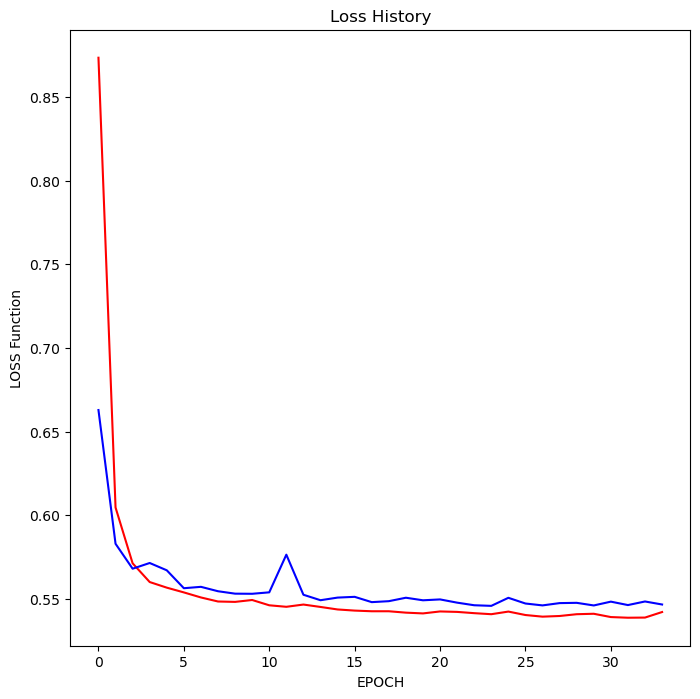

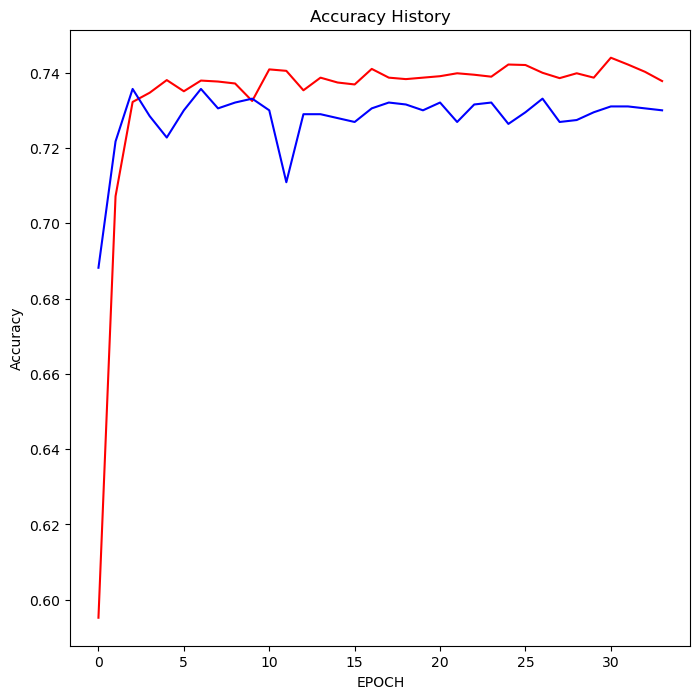

In [100]:
train_history = history.history["loss"]
validation_history = history.history["val_loss"]
fig = plt.figure(figsize=(8, 8))
plt.title("Loss History")
plt.xlabel("EPOCH")
plt.ylabel("LOSS Function")
plt.plot(train_history, "red")
plt.plot(validation_history, 'blue')
fig.savefig("train_history.png")

train_history = history.history["accuracy"]
validation_history = history.history["val_accuracy"]
fig = plt.figure(figsize=(8, 8))
plt.title("Accuracy History")
plt.xlabel("EPOCH")
plt.ylabel("Accuracy")
plt.plot(train_history, "red")
plt.plot(validation_history, 'blue')
fig.savefig("accuracy_history.png")

In [104]:
# 학교 유형 매핑
school_types = {0:'초',1:'중',2:'고'}

# 예측 결과에서 가장 높은 확률의 인덱스를 찾고 매핑
predicted_classes = np.argmax(pred, axis=1)
predicted_school_types = [school_types[i] for i in predicted_classes]

# 결과 출력
predicted_school_types

['초',
 '고',
 '고',
 '초',
 '고',
 '중',
 '고',
 '초',
 '고',
 '고',
 '초',
 '초',
 '초',
 '고',
 '중',
 '초',
 '중',
 '고',
 '고',
 '고',
 '고',
 '고',
 '중',
 '중',
 '초',
 '고',
 '고',
 '초',
 '고',
 '초',
 '고',
 '초',
 '초',
 '중',
 '중',
 '초',
 '고',
 '고',
 '고',
 '고',
 '고',
 '고',
 '고',
 '고',
 '초',
 '초',
 '고',
 '초',
 '고',
 '고',
 '초',
 '초',
 '중',
 '중',
 '중',
 '고',
 '고',
 '고',
 '초',
 '초',
 '초',
 '고',
 '초',
 '고',
 '고',
 '초',
 '초',
 '중',
 '고',
 '초',
 '고',
 '고',
 '중',
 '초',
 '중',
 '고',
 '초',
 '고',
 '초',
 '초',
 '초',
 '중',
 '고',
 '고',
 '중',
 '고',
 '고',
 '중',
 '고',
 '중',
 '초',
 '초',
 '고',
 '초',
 '고',
 '중',
 '초',
 '고',
 '고',
 '초',
 '초',
 '고',
 '고',
 '초',
 '초',
 '초',
 '중',
 '초',
 '중',
 '초',
 '중',
 '중',
 '초',
 '고',
 '초',
 '초',
 '초',
 '초',
 '초',
 '중',
 '초',
 '고',
 '고',
 '중',
 '고',
 '초',
 '고',
 '고',
 '초',
 '초',
 '초',
 '고',
 '고',
 '초',
 '중',
 '초',
 '초',
 '중',
 '초',
 '초',
 '중',
 '고',
 '고',
 '중',
 '고',
 '중',
 '초',
 '고',
 '고',
 '초',
 '초',
 '중',
 '초',
 '초',
 '고',
 '초',
 '고',
 '중',
 '고',
 '중',
 '고',
 '고',
 '초',
 '중',
 '고',
 '고',
 '고'